# The Rhinovirus infection dataset

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

In [1]:
import scanpy as sc
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 26420 × 3608
    obs: 'batch', 'leiden', 'cell_type1021'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type1021_colors', 'cell_type1021_sizes', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [2]:
import numpy as np
print(np.unique(adata.obs['cell_type1021']))
print(np.unique(adata.obs['batch']))

['Basal' 'Brush+PNEC' 'Ciliated' 'Cycling basal' 'Doublet' 'Hillock'
 'Ionocyte' 'Myoepithelial' 'Pre-ciliated' 'Secretory']
['CSE' 'MOCK' 'RV' 'RVCSE']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 12255 × 3608
    obs: 'batch', 'leiden', 'cell_type1021', 'perturbation'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type1021_colors', 'cell_type1021_sizes', 'hvg', 'leiden', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
[[-0.13127026 -0.6043305  -0.42346737 -0.5286249  -0.585026   -0.40917814
  -0.5307799  -0.34020615 -0.17789422 -0.20318672]
 [-0.13127026 -0.6043305  -0.42346737 -0.5286249  -0.585026    0.5870511
   0.23046492  0.8015358  -0.17789422 -0.20318672]
 [-0.13127026  0.10818027 -0.42346737  0.7196166  -0.585026   -0.40917814
  -0.5307799   1.6135037  -0.17789422 -0.20318672]
 [-0.13127026 -0.6043305  -0.42346737 -0.5286249   3.4485416  -0.40917814
  -0.5307799  -0.34020615 -0.17789422 -0.20318672]
 [-0.13127026 -0.6043305  -0.42346737 -0.5286249 

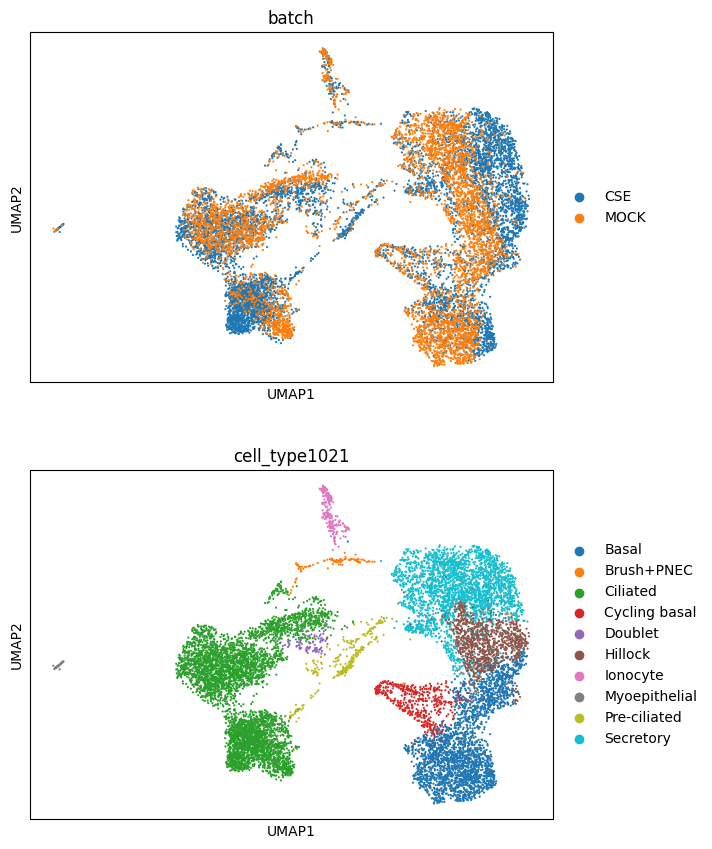

In [3]:
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
print(adata)
print(adata.X[:10,:10])
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,ncols=1,color=["batch","cell_type1021"])

In [4]:
from ndreamer import NDreamer
model = NDreamer(adata, condition_key="perturbation", contorl_name='MOCK', num_hvg=3608, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./virus/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./virus/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20, have_negative_data=True)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'MOCK': 0, 'CSE': 1}
Condition mapping to adata.obs['batch']: {'batch': {0: 0}}
Unique batch mapping: {0: 0}
Calculating the clusters
Unique groups: ['0_CSE' '0_MOCK']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:38: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  clustering_function(adata, resolution=resolution1)


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:100: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = clustered_adatas[0].concatenate(*clustered_adatas[1:], batch_key="batch_condition",
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Obser

Finished clustering
Data preprocessing done


Remaining number of cells: 12255
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {0: 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'MOCK': 0, 'CSE': 1}
Preprocessing time: 10.38394 seconds


Overall Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Indices are not unique. Adding condition information to adata.obs_names


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/data_preprocess.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  names=[names[i]+adata.obs["group"][i] for i in range(len(names))]


Epoch: 1/100 | All Loss: 177.5084 | Neighborhood Loss: 73.9619 | Triplet Loss: 78.2738 | Reconstruction Loss: 20.6378 | Independent Loss: 13.8377 | KL Loss: 0.3616 | Commitment Loss: 0.5794 | Dependent Loss: -10.1438


Epoch: 2/100 | All Loss: 137.1078 | Neighborhood Loss: 92.7792 | Triplet Loss: 23.8751 | Reconstruction Loss: 19.7866 | Independent Loss: 11.1176 | KL Loss: 0.3817 | Commitment Loss: 0.5848 | Dependent Loss: -11.4171


Epoch: 3/100 | All Loss: 116.0171 | Neighborhood Loss: 85.0703 | Triplet Loss: 12.1801 | Reconstruction Loss: 19.2878 | Independent Loss: 10.2867 | KL Loss: 0.4024 | Commitment Loss: 0.5831 | Dependent Loss: -11.7934


Epoch: 4/100 | All Loss: 105.8530 | Neighborhood Loss: 79.6394 | Triplet Loss: 9.7839 | Reconstruction Loss: 18.2806 | Independent Loss: 9.1948 | KL Loss: 0.3929 | Commitment Loss: 0.5850 | Dependent Loss: -12.0237


Epoch: 5/100 | All Loss: 121.0645 | Neighborhood Loss: 98.7370 | Triplet Loss: 8.5123 | Reconstruction Loss: 16.8564 | Independent Loss: 8.3965 | KL Loss: 0.3831 | Commitment Loss: 0.5818 | Dependent Loss: -12.4028


Epoch: 6/100 | All Loss: 104.3417 | Neighborhood Loss: 85.2733 | Triplet Loss: 6.2527 | Reconstruction Loss: 15.9776 | Independent Loss: 8.3339 | KL Loss: 0.3787 | Commitment Loss: 0.5775 | Dependent Loss: -12.4521


Epoch: 7/100 | All Loss: 107.7917 | Neighborhood Loss: 92.9618 | Triplet Loss: 4.9887 | Reconstruction Loss: 15.4686 | Independent Loss: 5.8889 | KL Loss: 0.3655 | Commitment Loss: 0.5772 | Dependent Loss: -12.4590


Epoch: 8/100 | All Loss: 98.0478 | Neighborhood Loss: 83.8616 | Triplet Loss: 5.1622 | Reconstruction Loss: 15.1958 | Independent Loss: 5.6024 | KL Loss: 0.3473 | Commitment Loss: 0.5731 | Dependent Loss: -12.6945


Epoch: 9/100 | All Loss: 104.9371 | Neighborhood Loss: 86.1123 | Triplet Loss: 6.4689 | Reconstruction Loss: 15.1378 | Independent Loss: 8.7856 | KL Loss: 0.3247 | Commitment Loss: 0.5729 | Dependent Loss: -12.4650


Epoch: 10/100 | All Loss: 102.1251 | Neighborhood Loss: 87.0329 | Triplet Loss: 4.2944 | Reconstruction Loss: 15.1159 | Independent Loss: 7.3572 | KL Loss: 0.2999 | Commitment Loss: 0.5684 | Dependent Loss: -12.5436


Epoch: 11/100 | All Loss: 96.1940 | Neighborhood Loss: 80.1505 | Triplet Loss: 5.9836 | Reconstruction Loss: 15.0496 | Independent Loss: 6.6044 | KL Loss: 0.2825 | Commitment Loss: 0.5696 | Dependent Loss: -12.4463


Epoch: 12/100 | All Loss: 92.4977 | Neighborhood Loss: 77.6934 | Triplet Loss: 5.0726 | Reconstruction Loss: 14.8998 | Independent Loss: 6.4598 | KL Loss: 0.2735 | Commitment Loss: 0.5735 | Dependent Loss: -12.4749


Epoch: 13/100 | All Loss: 91.1911 | Neighborhood Loss: 77.1389 | Triplet Loss: 4.1614 | Reconstruction Loss: 14.8071 | Independent Loss: 6.6576 | KL Loss: 0.2731 | Commitment Loss: 0.5728 | Dependent Loss: -12.4199


Epoch: 14/100 | All Loss: 101.8966 | Neighborhood Loss: 86.6196 | Triplet Loss: 5.2740 | Reconstruction Loss: 14.6754 | Independent Loss: 6.6498 | KL Loss: 0.2736 | Commitment Loss: 0.5718 | Dependent Loss: -12.1674


Resetting 802 unused embeddings.
Resetting 811 unused embeddings.
Resetting 790 unused embeddings.
Resetting 814 unused embeddings.


Resetting 774 unused embeddings.
Resetting 778 unused embeddings.
Resetting 774 unused embeddings.
Resetting 809 unused embeddings.


Resetting 795 unused embeddings.
Resetting 804 unused embeddings.
Resetting 802 unused embeddings.
Resetting 772 unused embeddings.


Resetting 795 unused embeddings.
Resetting 758 unused embeddings.
Resetting 784 unused embeddings.
Resetting 785 unused embeddings.


Resetting 822 unused embeddings.
Resetting 802 unused embeddings.
Resetting 796 unused embeddings.
Resetting 793 unused embeddings.


Resetting 809 unused embeddings.
Resetting 808 unused embeddings.
Resetting 793 unused embeddings.
Resetting 794 unused embeddings.


Resetting 825 unused embeddings.
Resetting 791 unused embeddings.
Resetting 787 unused embeddings.
Resetting 764 unused embeddings.


Resetting 843 unused embeddings.
Resetting 840 unused embeddings.
Resetting 787 unused embeddings.
Resetting 758 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/100 | All Loss: 46.6683 | Neighborhood Loss: 39.3624 | Triplet Loss: 2.3023 | Reconstruction Loss: 7.2659 | Independent Loss: 3.5301 | KL Loss: 0.1382 | Commitment Loss: 0.2893 | Dependent Loss: -6.2200


Epoch: 16/100 | All Loss: 101.8018 | Neighborhood Loss: 83.3363 | Triplet Loss: 6.5982 | Reconstruction Loss: 14.6787 | Independent Loss: 5.8384 | KL Loss: 0.2408 | Commitment Loss: 0.3391 | Dependent Loss: -9.2296


Epoch: 17/100 | All Loss: 99.9389 | Neighborhood Loss: 83.1432 | Triplet Loss: 6.5872 | Reconstruction Loss: 14.5230 | Independent Loss: 4.3591 | KL Loss: 0.2321 | Commitment Loss: 0.3302 | Dependent Loss: -9.2361


Epoch: 18/100 | All Loss: 106.4545 | Neighborhood Loss: 88.1577 | Triplet Loss: 6.7514 | Reconstruction Loss: 14.5121 | Independent Loss: 5.8015 | KL Loss: 0.2263 | Commitment Loss: 0.3386 | Dependent Loss: -9.3331


Epoch: 19/100 | All Loss: 93.7039 | Neighborhood Loss: 78.2412 | Triplet Loss: 4.9113 | Reconstruction Loss: 14.4197 | Independent Loss: 4.8743 | KL Loss: 0.2158 | Commitment Loss: 0.3322 | Dependent Loss: -9.2905


Epoch: 20/100 | All Loss: 96.9693 | Neighborhood Loss: 82.6335 | Triplet Loss: 4.3854 | Reconstruction Loss: 14.5662 | Independent Loss: 4.1331 | KL Loss: 0.2072 | Commitment Loss: 0.3392 | Dependent Loss: -9.2952


Epoch: 21/100 | All Loss: 90.5478 | Neighborhood Loss: 77.1507 | Triplet Loss: 3.8535 | Reconstruction Loss: 14.4357 | Independent Loss: 3.9781 | KL Loss: 0.1988 | Commitment Loss: 0.3467 | Dependent Loss: -9.4157


Epoch: 22/100 | All Loss: 89.4928 | Neighborhood Loss: 76.8774 | Triplet Loss: 3.6447 | Reconstruction Loss: 14.5427 | Independent Loss: 3.3738 | KL Loss: 0.1920 | Commitment Loss: 0.3495 | Dependent Loss: -9.4874


Epoch: 23/100 | All Loss: 104.4548 | Neighborhood Loss: 89.5608 | Triplet Loss: 4.0814 | Reconstruction Loss: 14.8199 | Independent Loss: 4.8946 | KL Loss: 0.1833 | Commitment Loss: 0.3549 | Dependent Loss: -9.4402


Epoch: 24/100 | All Loss: 100.8645 | Neighborhood Loss: 85.3978 | Triplet Loss: 4.3753 | Reconstruction Loss: 14.9414 | Independent Loss: 5.0625 | KL Loss: 0.1783 | Commitment Loss: 0.3547 | Dependent Loss: -9.4455


Epoch: 25/100 | All Loss: 98.1152 | Neighborhood Loss: 83.3702 | Triplet Loss: 4.3414 | Reconstruction Loss: 15.1119 | Independent Loss: 4.2588 | KL Loss: 0.1807 | Commitment Loss: 0.3657 | Dependent Loss: -9.5134


Epoch: 26/100 | All Loss: 92.3586 | Neighborhood Loss: 78.1195 | Triplet Loss: 4.1994 | Reconstruction Loss: 14.9565 | Independent Loss: 4.1534 | KL Loss: 0.1879 | Commitment Loss: 0.3726 | Dependent Loss: -9.6306


Epoch: 27/100 | All Loss: 102.2084 | Neighborhood Loss: 88.2854 | Triplet Loss: 4.9329 | Reconstruction Loss: 14.8172 | Independent Loss: 3.1910 | KL Loss: 0.1983 | Commitment Loss: 0.3752 | Dependent Loss: -9.5916


Epoch: 28/100 | All Loss: 93.6767 | Neighborhood Loss: 80.5138 | Triplet Loss: 3.3511 | Reconstruction Loss: 14.7667 | Independent Loss: 3.9109 | KL Loss: 0.2009 | Commitment Loss: 0.3663 | Dependent Loss: -9.4330


Epoch: 29/100 | All Loss: 90.1433 | Neighborhood Loss: 76.3684 | Triplet Loss: 4.2432 | Reconstruction Loss: 14.7948 | Independent Loss: 3.5947 | KL Loss: 0.2090 | Commitment Loss: 0.3715 | Dependent Loss: -9.4382


Resetting 778 unused embeddings.
Resetting 715 unused embeddings.
Resetting 736 unused embeddings.
Resetting 824 unused embeddings.


Resetting 727 unused embeddings.
Resetting 758 unused embeddings.
Resetting 772 unused embeddings.
Resetting 736 unused embeddings.


Resetting 829 unused embeddings.
Resetting 761 unused embeddings.
Resetting 699 unused embeddings.
Resetting 724 unused embeddings.


Resetting 795 unused embeddings.
Resetting 779 unused embeddings.
Resetting 774 unused embeddings.
Resetting 732 unused embeddings.


Resetting 802 unused embeddings.
Resetting 760 unused embeddings.
Resetting 736 unused embeddings.
Resetting 750 unused embeddings.


Resetting 785 unused embeddings.
Resetting 794 unused embeddings.
Resetting 716 unused embeddings.
Resetting 773 unused embeddings.


Resetting 859 unused embeddings.
Resetting 810 unused embeddings.
Resetting 818 unused embeddings.
Resetting 761 unused embeddings.


Resetting 794 unused embeddings.
Resetting 750 unused embeddings.
Resetting 777 unused embeddings.
Resetting 788 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/100 | All Loss: 43.8192 | Neighborhood Loss: 36.4760 | Triplet Loss: 1.8618 | Reconstruction Loss: 7.3337 | Independent Loss: 2.6180 | KL Loss: 0.1049 | Commitment Loss: 0.1806 | Dependent Loss: -4.7558


Epoch: 31/100 | All Loss: 104.5059 | Neighborhood Loss: 91.5357 | Triplet Loss: 3.7022 | Reconstruction Loss: 14.6839 | Independent Loss: 4.2542 | KL Loss: 0.2269 | Commitment Loss: 0.2720 | Dependent Loss: -10.1690


Epoch: 32/100 | All Loss: 85.6340 | Neighborhood Loss: 73.5339 | Triplet Loss: 3.7767 | Reconstruction Loss: 14.4924 | Independent Loss: 3.6048 | KL Loss: 0.2189 | Commitment Loss: 0.2680 | Dependent Loss: -10.2607


Epoch: 33/100 | All Loss: 91.0485 | Neighborhood Loss: 77.4627 | Triplet Loss: 4.1988 | Reconstruction Loss: 14.6634 | Independent Loss: 4.3998 | KL Loss: 0.2145 | Commitment Loss: 0.2722 | Dependent Loss: -10.1629


Epoch: 34/100 | All Loss: 93.8645 | Neighborhood Loss: 81.4215 | Triplet Loss: 3.6617 | Reconstruction Loss: 14.8063 | Independent Loss: 3.8633 | KL Loss: 0.2131 | Commitment Loss: 0.2769 | Dependent Loss: -10.3784


Epoch: 35/100 | All Loss: 90.7279 | Neighborhood Loss: 75.4944 | Triplet Loss: 4.6472 | Reconstruction Loss: 14.7224 | Independent Loss: 5.6239 | KL Loss: 0.2061 | Commitment Loss: 0.2746 | Dependent Loss: -10.2407


Epoch: 36/100 | All Loss: 84.5391 | Neighborhood Loss: 71.2808 | Triplet Loss: 4.0270 | Reconstruction Loss: 14.7566 | Independent Loss: 4.2901 | KL Loss: 0.2006 | Commitment Loss: 0.2781 | Dependent Loss: -10.2942


Epoch: 37/100 | All Loss: 82.2770 | Neighborhood Loss: 68.5097 | Triplet Loss: 3.8800 | Reconstruction Loss: 14.9192 | Independent Loss: 5.0461 | KL Loss: 0.1973 | Commitment Loss: 0.2801 | Dependent Loss: -10.5553


Epoch: 38/100 | All Loss: 91.9925 | Neighborhood Loss: 79.7319 | Triplet Loss: 3.7317 | Reconstruction Loss: 14.8209 | Independent Loss: 3.8418 | KL Loss: 0.1962 | Commitment Loss: 0.2898 | Dependent Loss: -10.6198


Epoch: 39/100 | All Loss: 86.6089 | Neighborhood Loss: 75.2107 | Triplet Loss: 3.5496 | Reconstruction Loss: 14.7579 | Independent Loss: 3.2248 | KL Loss: 0.1951 | Commitment Loss: 0.2919 | Dependent Loss: -10.6210


Epoch: 40/100 | All Loss: 83.5589 | Neighborhood Loss: 69.6299 | Triplet Loss: 4.1165 | Reconstruction Loss: 14.7549 | Independent Loss: 5.1557 | KL Loss: 0.1926 | Commitment Loss: 0.2932 | Dependent Loss: -10.5838


Epoch: 41/100 | All Loss: 84.5126 | Neighborhood Loss: 71.4361 | Triplet Loss: 3.5391 | Reconstruction Loss: 14.6312 | Independent Loss: 5.0566 | KL Loss: 0.1927 | Commitment Loss: 0.2985 | Dependent Loss: -10.6417


Epoch: 42/100 | All Loss: 96.6527 | Neighborhood Loss: 81.7180 | Triplet Loss: 4.3276 | Reconstruction Loss: 14.7916 | Independent Loss: 5.9877 | KL Loss: 0.1876 | Commitment Loss: 0.3000 | Dependent Loss: -10.6600


Epoch: 43/100 | All Loss: 77.7185 | Neighborhood Loss: 64.5507 | Triplet Loss: 4.1888 | Reconstruction Loss: 15.0022 | Independent Loss: 4.2555 | KL Loss: 0.1844 | Commitment Loss: 0.3036 | Dependent Loss: -10.7667


Epoch: 44/100 | All Loss: 92.7077 | Neighborhood Loss: 82.2184 | Triplet Loss: 2.9367 | Reconstruction Loss: 15.0004 | Independent Loss: 2.8499 | KL Loss: 0.1849 | Commitment Loss: 0.3047 | Dependent Loss: -10.7872


Resetting 772 unused embeddings.
Resetting 721 unused embeddings.
Resetting 684 unused embeddings.
Resetting 797 unused embeddings.


Resetting 708 unused embeddings.
Resetting 689 unused embeddings.
Resetting 742 unused embeddings.
Resetting 668 unused embeddings.


Resetting 780 unused embeddings.
Resetting 750 unused embeddings.
Resetting 666 unused embeddings.
Resetting 658 unused embeddings.


Resetting 786 unused embeddings.
Resetting 721 unused embeddings.
Resetting 739 unused embeddings.
Resetting 687 unused embeddings.


Resetting 755 unused embeddings.
Resetting 753 unused embeddings.
Resetting 694 unused embeddings.
Resetting 714 unused embeddings.


Resetting 735 unused embeddings.
Resetting 782 unused embeddings.
Resetting 714 unused embeddings.
Resetting 698 unused embeddings.


Resetting 772 unused embeddings.
Resetting 769 unused embeddings.
Resetting 770 unused embeddings.
Resetting 735 unused embeddings.


Resetting 789 unused embeddings.
Resetting 684 unused embeddings.
Resetting 726 unused embeddings.
Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 44
Epoch: 45/100 | All Loss: 37.1305 | Neighborhood Loss: 32.2694 | Triplet Loss: 1.6547 | Reconstruction Loss: 7.3623 | Independent Loss: 0.9420 | KL Loss: 0.0932 | Commitment Loss: 0.1507 | Dependent Loss: -5.3419


Epoch: 46/100 | All Loss: 89.7921 | Neighborhood Loss: 77.5490 | Triplet Loss: 3.0122 | Reconstruction Loss: 14.7280 | Independent Loss: 5.0441 | KL Loss: 0.1933 | Commitment Loss: 0.2691 | Dependent Loss: -11.0036


Epoch: 47/100 | All Loss: 94.1207 | Neighborhood Loss: 83.4030 | Triplet Loss: 2.7866 | Reconstruction Loss: 14.6585 | Independent Loss: 3.8027 | KL Loss: 0.1918 | Commitment Loss: 0.2717 | Dependent Loss: -10.9936


Epoch: 48/100 | All Loss: 96.8681 | Neighborhood Loss: 83.0916 | Triplet Loss: 4.2298 | Reconstruction Loss: 14.7974 | Independent Loss: 5.1427 | KL Loss: 0.1891 | Commitment Loss: 0.2708 | Dependent Loss: -10.8534


Epoch: 49/100 | All Loss: 81.9106 | Neighborhood Loss: 70.3117 | Triplet Loss: 3.3054 | Reconstruction Loss: 14.7994 | Independent Loss: 4.0027 | KL Loss: 0.1861 | Commitment Loss: 0.2741 | Dependent Loss: -10.9687


Epoch: 50/100 | All Loss: 95.4760 | Neighborhood Loss: 82.1884 | Triplet Loss: 3.7867 | Reconstruction Loss: 14.5449 | Independent Loss: 5.2386 | KL Loss: 0.1837 | Commitment Loss: 0.2705 | Dependent Loss: -10.7367


Epoch: 51/100 | All Loss: 83.5902 | Neighborhood Loss: 71.8702 | Triplet Loss: 3.5816 | Reconstruction Loss: 14.8247 | Independent Loss: 3.8411 | KL Loss: 0.1876 | Commitment Loss: 0.2774 | Dependent Loss: -10.9925


Epoch: 52/100 | All Loss: 81.3268 | Neighborhood Loss: 69.0559 | Triplet Loss: 3.0732 | Reconstruction Loss: 14.7846 | Independent Loss: 4.8684 | KL Loss: 0.1860 | Commitment Loss: 0.2768 | Dependent Loss: -10.9179


Epoch: 53/100 | All Loss: 89.9376 | Neighborhood Loss: 78.5816 | Triplet Loss: 4.0298 | Reconstruction Loss: 14.8189 | Independent Loss: 2.9003 | KL Loss: 0.1840 | Commitment Loss: 0.2789 | Dependent Loss: -10.8558


Epoch: 54/100 | All Loss: 72.0737 | Neighborhood Loss: 59.9733 | Triplet Loss: 3.0400 | Reconstruction Loss: 14.8641 | Independent Loss: 4.5750 | KL Loss: 0.1848 | Commitment Loss: 0.2784 | Dependent Loss: -10.8421


Epoch: 55/100 | All Loss: 88.7827 | Neighborhood Loss: 77.6720 | Triplet Loss: 3.2319 | Reconstruction Loss: 14.6992 | Independent Loss: 3.5822 | KL Loss: 0.1869 | Commitment Loss: 0.2783 | Dependent Loss: -10.8678


Epoch: 56/100 | All Loss: 89.6682 | Neighborhood Loss: 78.8849 | Triplet Loss: 3.3180 | Reconstruction Loss: 14.7571 | Independent Loss: 3.2660 | KL Loss: 0.1873 | Commitment Loss: 0.2801 | Dependent Loss: -11.0253


Epoch: 57/100 | All Loss: 94.5816 | Neighborhood Loss: 83.6361 | Triplet Loss: 3.0421 | Reconstruction Loss: 14.9984 | Independent Loss: 3.4994 | KL Loss: 0.1860 | Commitment Loss: 0.2817 | Dependent Loss: -11.0621


Epoch: 58/100 | All Loss: 79.6563 | Neighborhood Loss: 68.0934 | Triplet Loss: 4.4326 | Reconstruction Loss: 14.8001 | Independent Loss: 2.8921 | KL Loss: 0.1822 | Commitment Loss: 0.2842 | Dependent Loss: -11.0284


Epoch: 59/100 | All Loss: 88.4855 | Neighborhood Loss: 77.1177 | Triplet Loss: 3.7942 | Reconstruction Loss: 14.5952 | Independent Loss: 3.5751 | KL Loss: 0.1865 | Commitment Loss: 0.2855 | Dependent Loss: -11.0687


Resetting 777 unused embeddings.
Resetting 725 unused embeddings.
Resetting 690 unused embeddings.
Resetting 778 unused embeddings.


Resetting 699 unused embeddings.
Resetting 696 unused embeddings.
Resetting 738 unused embeddings.
Resetting 657 unused embeddings.


Resetting 766 unused embeddings.
Resetting 752 unused embeddings.
Resetting 661 unused embeddings.
Resetting 659 unused embeddings.


Resetting 780 unused embeddings.
Resetting 676 unused embeddings.
Resetting 736 unused embeddings.
Resetting 685 unused embeddings.


Resetting 750 unused embeddings.
Resetting 754 unused embeddings.
Resetting 695 unused embeddings.
Resetting 715 unused embeddings.


Resetting 718 unused embeddings.
Resetting 781 unused embeddings.
Resetting 724 unused embeddings.
Resetting 690 unused embeddings.


Resetting 720 unused embeddings.
Resetting 765 unused embeddings.
Resetting 756 unused embeddings.
Resetting 734 unused embeddings.


Resetting 786 unused embeddings.
Resetting 675 unused embeddings.
Resetting 702 unused embeddings.
Resetting 716 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 59
Epoch: 60/100 | All Loss: 41.6207 | Neighborhood Loss: 36.3836 | Triplet Loss: 1.4403 | Reconstruction Loss: 7.2544 | Independent Loss: 1.9047 | KL Loss: 0.0966 | Commitment Loss: 0.1457 | Dependent Loss: -5.6044


Epoch: 61/100 | All Loss: 89.4080 | Neighborhood Loss: 78.0633 | Triplet Loss: 3.4092 | Reconstruction Loss: 14.6842 | Independent Loss: 4.0951 | KL Loss: 0.1903 | Commitment Loss: 0.2590 | Dependent Loss: -11.2930


Epoch: 62/100 | All Loss: 89.4273 | Neighborhood Loss: 77.4470 | Triplet Loss: 3.6032 | Reconstruction Loss: 14.7905 | Independent Loss: 4.4719 | KL Loss: 0.1818 | Commitment Loss: 0.2584 | Dependent Loss: -11.3256


Epoch: 63/100 | All Loss: 79.7346 | Neighborhood Loss: 67.6259 | Triplet Loss: 3.8319 | Reconstruction Loss: 14.8827 | Independent Loss: 4.1840 | KL Loss: 0.1759 | Commitment Loss: 0.2597 | Dependent Loss: -11.2255


Epoch: 64/100 | All Loss: 84.4500 | Neighborhood Loss: 74.8854 | Triplet Loss: 3.2301 | Reconstruction Loss: 14.7896 | Independent Loss: 2.4510 | KL Loss: 0.1779 | Commitment Loss: 0.2552 | Dependent Loss: -11.3393


Epoch: 65/100 | All Loss: 79.9713 | Neighborhood Loss: 67.8614 | Triplet Loss: 3.5352 | Reconstruction Loss: 14.7837 | Independent Loss: 4.6183 | KL Loss: 0.1779 | Commitment Loss: 0.2592 | Dependent Loss: -11.2643


Epoch: 66/100 | All Loss: 84.9166 | Neighborhood Loss: 73.9118 | Triplet Loss: 2.8602 | Reconstruction Loss: 14.5724 | Independent Loss: 4.4217 | KL Loss: 0.1754 | Commitment Loss: 0.2612 | Dependent Loss: -11.2862


Epoch: 67/100 | All Loss: 99.4521 | Neighborhood Loss: 88.8597 | Triplet Loss: 3.2466 | Reconstruction Loss: 14.7730 | Independent Loss: 3.3868 | KL Loss: 0.1722 | Commitment Loss: 0.2622 | Dependent Loss: -11.2483


Epoch: 68/100 | All Loss: 77.8305 | Neighborhood Loss: 66.9976 | Triplet Loss: 3.1604 | Reconstruction Loss: 14.9958 | Independent Loss: 3.5481 | KL Loss: 0.1683 | Commitment Loss: 0.2623 | Dependent Loss: -11.3020


Epoch: 69/100 | All Loss: 81.7864 | Neighborhood Loss: 70.8018 | Triplet Loss: 4.2704 | Reconstruction Loss: 14.8644 | Independent Loss: 2.7907 | KL Loss: 0.1731 | Commitment Loss: 0.2639 | Dependent Loss: -11.3777


Epoch: 70/100 | All Loss: 85.3488 | Neighborhood Loss: 74.1791 | Triplet Loss: 3.6714 | Reconstruction Loss: 14.6938 | Independent Loss: 3.7825 | KL Loss: 0.1795 | Commitment Loss: 0.2630 | Dependent Loss: -11.4205


Epoch: 71/100 | All Loss: 84.1285 | Neighborhood Loss: 72.2774 | Triplet Loss: 4.2115 | Reconstruction Loss: 14.5627 | Independent Loss: 3.9890 | KL Loss: 0.1781 | Commitment Loss: 0.2632 | Dependent Loss: -11.3535


Epoch: 72/100 | All Loss: 97.3395 | Neighborhood Loss: 85.4212 | Triplet Loss: 3.5351 | Reconstruction Loss: 14.6960 | Independent Loss: 4.6374 | KL Loss: 0.1787 | Commitment Loss: 0.2621 | Dependent Loss: -11.3910


Epoch: 73/100 | All Loss: 91.9187 | Neighborhood Loss: 81.0110 | Triplet Loss: 3.0892 | Reconstruction Loss: 14.6501 | Independent Loss: 4.1723 | KL Loss: 0.1799 | Commitment Loss: 0.2625 | Dependent Loss: -11.4463


Epoch: 74/100 | All Loss: 79.0492 | Neighborhood Loss: 68.1163 | Triplet Loss: 3.2641 | Reconstruction Loss: 14.5362 | Independent Loss: 4.1100 | KL Loss: 0.1822 | Commitment Loss: 0.2603 | Dependent Loss: -11.4199


Resetting 789 unused embeddings.
Resetting 718 unused embeddings.
Resetting 685 unused embeddings.
Resetting 759 unused embeddings.


Resetting 706 unused embeddings.
Resetting 702 unused embeddings.
Resetting 743 unused embeddings.
Resetting 650 unused embeddings.


Resetting 764 unused embeddings.
Resetting 759 unused embeddings.
Resetting 668 unused embeddings.
Resetting 633 unused embeddings.


Resetting 779 unused embeddings.
Resetting 670 unused embeddings.
Resetting 719 unused embeddings.
Resetting 683 unused embeddings.


Resetting 734 unused embeddings.
Resetting 759 unused embeddings.
Resetting 689 unused embeddings.
Resetting 722 unused embeddings.


Resetting 713 unused embeddings.
Resetting 767 unused embeddings.
Resetting 718 unused embeddings.
Resetting 693 unused embeddings.


Resetting 695 unused embeddings.
Resetting 748 unused embeddings.
Resetting 739 unused embeddings.
Resetting 737 unused embeddings.


Resetting 747 unused embeddings.
Resetting 666 unused embeddings.
Resetting 701 unused embeddings.
Resetting 716 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 74
Epoch: 75/100 | All Loss: 38.9494 | Neighborhood Loss: 32.3327 | Triplet Loss: 1.7741 | Reconstruction Loss: 7.3053 | Independent Loss: 3.0451 | KL Loss: 0.0920 | Commitment Loss: 0.1313 | Dependent Loss: -5.7312


Epoch: 76/100 | All Loss: 82.0463 | Neighborhood Loss: 72.8084 | Triplet Loss: 2.4650 | Reconstruction Loss: 14.6442 | Independent Loss: 3.5477 | KL Loss: 0.1870 | Commitment Loss: 0.2376 | Dependent Loss: -11.8436


Epoch: 77/100 | All Loss: 84.2168 | Neighborhood Loss: 71.3227 | Triplet Loss: 3.8870 | Reconstruction Loss: 14.6770 | Independent Loss: 5.6456 | KL Loss: 0.1785 | Commitment Loss: 0.2351 | Dependent Loss: -11.7291


Epoch: 78/100 | All Loss: 82.2473 | Neighborhood Loss: 72.1860 | Triplet Loss: 2.8665 | Reconstruction Loss: 14.7869 | Independent Loss: 3.9967 | KL Loss: 0.1725 | Commitment Loss: 0.2380 | Dependent Loss: -11.9993


Epoch: 79/100 | All Loss: 81.5123 | Neighborhood Loss: 72.3598 | Triplet Loss: 3.1971 | Reconstruction Loss: 14.6456 | Independent Loss: 2.9799 | KL Loss: 0.1699 | Commitment Loss: 0.2373 | Dependent Loss: -12.0774


Epoch: 80/100 | All Loss: 77.9800 | Neighborhood Loss: 68.1721 | Triplet Loss: 3.2574 | Reconstruction Loss: 14.6721 | Independent Loss: 3.5283 | KL Loss: 0.1735 | Commitment Loss: 0.2383 | Dependent Loss: -12.0616


Epoch: 81/100 | All Loss: 98.7380 | Neighborhood Loss: 86.2753 | Triplet Loss: 4.3546 | Reconstruction Loss: 14.7987 | Independent Loss: 5.0060 | KL Loss: 0.1727 | Commitment Loss: 0.2418 | Dependent Loss: -12.1111


Epoch: 82/100 | All Loss: 85.9997 | Neighborhood Loss: 74.9235 | Triplet Loss: 3.6727 | Reconstruction Loss: 14.8840 | Independent Loss: 4.1055 | KL Loss: 0.1694 | Commitment Loss: 0.2469 | Dependent Loss: -12.0022


Epoch: 83/100 | All Loss: 93.2385 | Neighborhood Loss: 82.5354 | Triplet Loss: 3.3763 | Reconstruction Loss: 14.8104 | Independent Loss: 3.9061 | KL Loss: 0.1665 | Commitment Loss: 0.2487 | Dependent Loss: -11.8048


Epoch: 84/100 | All Loss: 103.8666 | Neighborhood Loss: 92.9233 | Triplet Loss: 3.1217 | Reconstruction Loss: 14.6412 | Independent Loss: 4.6995 | KL Loss: 0.1719 | Commitment Loss: 0.2487 | Dependent Loss: -11.9397


Epoch: 85/100 | All Loss: 81.4287 | Neighborhood Loss: 71.8458 | Triplet Loss: 2.7819 | Reconstruction Loss: 14.5647 | Independent Loss: 3.8451 | KL Loss: 0.1744 | Commitment Loss: 0.2454 | Dependent Loss: -12.0285


Epoch: 86/100 | All Loss: 81.4168 | Neighborhood Loss: 69.6715 | Triplet Loss: 3.4609 | Reconstruction Loss: 14.6344 | Independent Loss: 5.0313 | KL Loss: 0.1685 | Commitment Loss: 0.2491 | Dependent Loss: -11.7990


Epoch: 87/100 | All Loss: 72.8077 | Neighborhood Loss: 63.3598 | Triplet Loss: 3.3050 | Reconstruction Loss: 14.6475 | Independent Loss: 2.9802 | KL Loss: 0.1690 | Commitment Loss: 0.2478 | Dependent Loss: -11.9014


Epoch: 88/100 | All Loss: 80.7835 | Neighborhood Loss: 69.3069 | Triplet Loss: 4.6361 | Reconstruction Loss: 14.7362 | Independent Loss: 3.6606 | KL Loss: 0.1711 | Commitment Loss: 0.2504 | Dependent Loss: -11.9776


Epoch: 89/100 | All Loss: 84.5242 | Neighborhood Loss: 74.8399 | Triplet Loss: 3.2224 | Reconstruction Loss: 14.5821 | Independent Loss: 3.5413 | KL Loss: 0.1724 | Commitment Loss: 0.2517 | Dependent Loss: -12.0856


Resetting 799 unused embeddings.
Resetting 701 unused embeddings.
Resetting 687 unused embeddings.
Resetting 755 unused embeddings.


Resetting 710 unused embeddings.
Resetting 696 unused embeddings.
Resetting 687 unused embeddings.
Resetting 638 unused embeddings.


Resetting 768 unused embeddings.
Resetting 758 unused embeddings.
Resetting 661 unused embeddings.
Resetting 641 unused embeddings.


Resetting 779 unused embeddings.
Resetting 655 unused embeddings.
Resetting 686 unused embeddings.
Resetting 679 unused embeddings.


Resetting 694 unused embeddings.
Resetting 766 unused embeddings.
Resetting 676 unused embeddings.
Resetting 727 unused embeddings.


Resetting 714 unused embeddings.
Resetting 753 unused embeddings.
Resetting 721 unused embeddings.
Resetting 684 unused embeddings.


Resetting 681 unused embeddings.
Resetting 736 unused embeddings.
Resetting 729 unused embeddings.
Resetting 740 unused embeddings.


Resetting 735 unused embeddings.
Resetting 667 unused embeddings.
Resetting 679 unused embeddings.
Resetting 702 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 89
Epoch: 90/100 | All Loss: 45.4322 | Neighborhood Loss: 39.8921 | Triplet Loss: 1.3204 | Reconstruction Loss: 7.3183 | Independent Loss: 2.8036 | KL Loss: 0.0866 | Commitment Loss: 0.1272 | Dependent Loss: -6.1159


Epoch: 91/100 | All Loss: 84.4799 | Neighborhood Loss: 73.6903 | Triplet Loss: 2.9895 | Reconstruction Loss: 14.4926 | Independent Loss: 5.2348 | KL Loss: 0.1752 | Commitment Loss: 0.2121 | Dependent Loss: -12.3146


Epoch: 92/100 | All Loss: 77.1368 | Neighborhood Loss: 67.9301 | Triplet Loss: 2.9201 | Reconstruction Loss: 14.6282 | Independent Loss: 3.6595 | KL Loss: 0.1702 | Commitment Loss: 0.2148 | Dependent Loss: -12.3860


Epoch: 93/100 | All Loss: 85.2458 | Neighborhood Loss: 73.4942 | Triplet Loss: 3.7037 | Reconstruction Loss: 14.8021 | Independent Loss: 5.1273 | KL Loss: 0.1625 | Commitment Loss: 0.2157 | Dependent Loss: -12.2597


Epoch: 94/100 | All Loss: 72.3458 | Neighborhood Loss: 62.5089 | Triplet Loss: 4.0304 | Reconstruction Loss: 14.7504 | Independent Loss: 2.9575 | KL Loss: 0.1644 | Commitment Loss: 0.2163 | Dependent Loss: -12.2820


Epoch: 95/100 | All Loss: 95.5837 | Neighborhood Loss: 86.2389 | Triplet Loss: 2.5470 | Reconstruction Loss: 14.7319 | Independent Loss: 3.9438 | KL Loss: 0.1765 | Commitment Loss: 0.2225 | Dependent Loss: -12.2770


Epoch: 96/100 | All Loss: 82.6731 | Neighborhood Loss: 73.0395 | Triplet Loss: 2.6879 | Reconstruction Loss: 14.4776 | Independent Loss: 4.3111 | KL Loss: 0.1727 | Commitment Loss: 0.2186 | Dependent Loss: -12.2343


Epoch: 97/100 | All Loss: 79.1508 | Neighborhood Loss: 67.8134 | Triplet Loss: 3.8036 | Reconstruction Loss: 14.6098 | Independent Loss: 4.6931 | KL Loss: 0.1696 | Commitment Loss: 0.2226 | Dependent Loss: -12.1612


Epoch: 98/100 | All Loss: 89.9640 | Neighborhood Loss: 80.3330 | Triplet Loss: 3.3423 | Reconstruction Loss: 14.6718 | Independent Loss: 3.5543 | KL Loss: 0.1637 | Commitment Loss: 0.2210 | Dependent Loss: -12.3220


Epoch: 99/100 | All Loss: 82.9303 | Neighborhood Loss: 74.3776 | Triplet Loss: 2.8566 | Reconstruction Loss: 14.6918 | Independent Loss: 3.0099 | KL Loss: 0.1667 | Commitment Loss: 0.2240 | Dependent Loss: -12.3965


Epoch: 100/100 | All Loss: 90.6533 | Neighborhood Loss: 79.4807 | Triplet Loss: 2.6885 | Reconstruction Loss: 14.5547 | Independent Loss: 5.7549 | KL Loss: 0.1665 | Commitment Loss: 0.2244 | Dependent Loss: -12.2163
Model training time: 863.78097 seconds


Effect modifier space saved.
Model evaluating time: 28.36662 seconds
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression


ITE evaluating: 1.16318 seconds


ITE evaluating: 1.40913 seconds


In [5]:
adata1=model.DL_model.adata.copy()

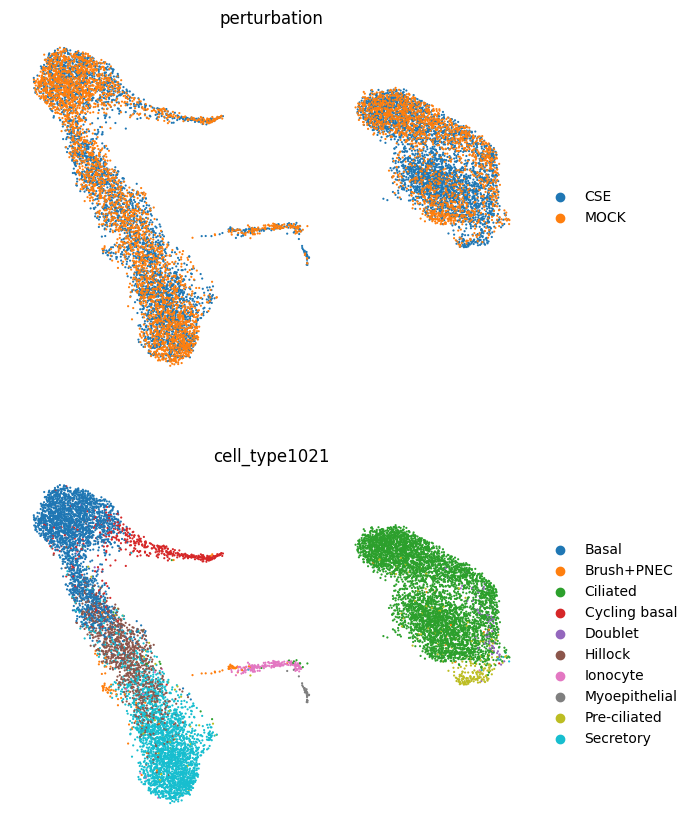

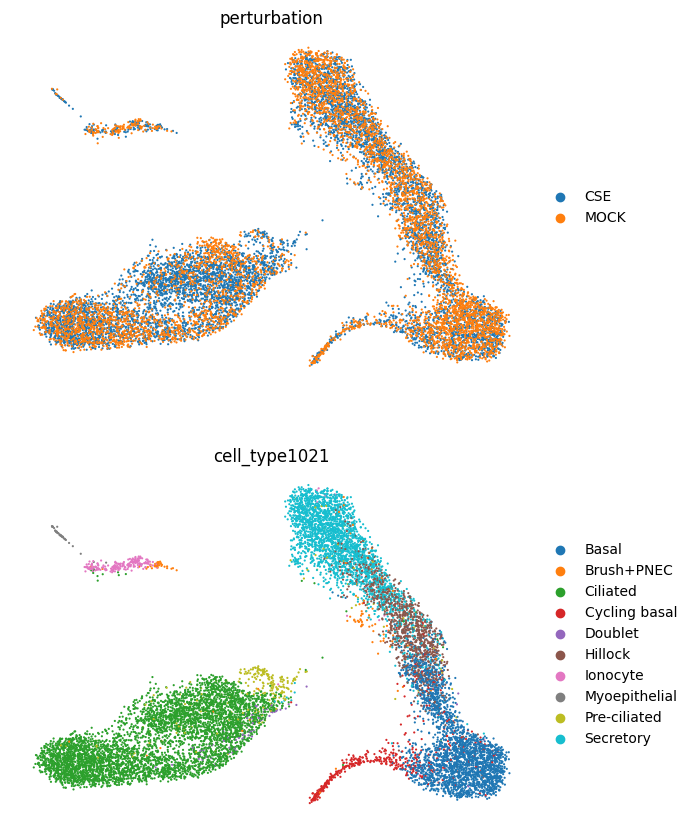

In [6]:
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], frameon=False, ncols=1)

In [7]:
import rpy2.robjects as robjects
import os
os.environ["R_HOME"]="/home/xx244/.conda/envs/benchmark/lib/R"
import anndata2ri
anndata2ri.activate()
from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type1021', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type1021', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


/tmp/ipykernel_2001221/2192594016.py:5: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major rele

R_HOME is already set to: /home/xx244/.conda/envs/benchmark/lib/R


LISI---


cLISI, bLISI, LISI_F1 0.9733029724524088 0.7533768668873613 0.8493339960449522


ASW---


asw_label 0.5557292178273201


asw_batch 0.9448261526043311


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


kbet_score 0.7468686656061696
graph_conn 0.9544144963399657


NMI, ARI ---
NMI 0.7259696071107924
ARI 0.7615932172288276
positive and true positive rate---


                             ASW_label       ARI      NMI   1-cLISI     bLISI  \
X_effect_modifier_space_PCA   0.555729  0.761593  0.72597  0.973303  0.753377   

                             ASW_batch  kBET Accept Rate  graph connectivity  \
X_effect_modifier_space_PCA   0.944826          0.746869            0.954414   

                             PCR_batch  pos rate  true pos rate   F1 LISI  
X_effect_modifier_space_PCA   0.436352  0.886251       0.741167  0.849334  
